# Analýza Náhodné Procházky (Random Walk) po Přímce

### 1. První aproximace: Střední kvadratická odchylka (RMS)

$$
\mathbf{R_{RMS} = \sqrt{\langle X^2 \rangle} = \sqrt{N}}
$$

*   **Vzorec:** $\mathbf{\sqrt{N}}$ (označeno jako $r$ v grafu: **Červená čárkovaná křivka**).
*   **Co vyjadřuje:** Jedná se o **střední kvadratickou odchylku** (Root Mean Square, RMS), která je de facto směrodatnou odchylkou $\sigma_X$ polohy $X$.
*   **Odvození:** Získá se jednoduchým výpočtem $\sqrt{\langle X^2 \rangle}$. Zahrnuje kvadráty vzdáleností, čímž dává větší váhu (význam) velkým odchylkám. Tato míra je ve fyzice a statistice velmi často používána.

### 2. Druhá aproximace: Střední absolutní vzdálenost

$$
\mathbf{\langle |X| \rangle \approx \sqrt{\frac{2N}{\pi}}}
$$

*   **Vzorec:** $\mathbf{\sqrt{2N/\pi}}$ (označeno jako $r$ v grafu: **Zelená čárkovaná křivka**).
*   **Co vyjadřuje:** Jedná se o **střední hodnotu absolutní vzdálenosti** od počátku, $\langle |X| \rangle$. Toto je *přesná* průměrná hodnota vzdálenosti, jak je obvykle intuitivně chápána.
*   **Odvození:** Pro velký počet kroků $N$ (dle Centrální limitní věty) se rozdělení polohy $X$ blíží Gaussovu rozdělení s rozptylem $\sigma^2 = N$. Střední absolutní hodnota Gaussova rozdělení s průměrem nula je $\sigma \sqrt{2/\pi}$.

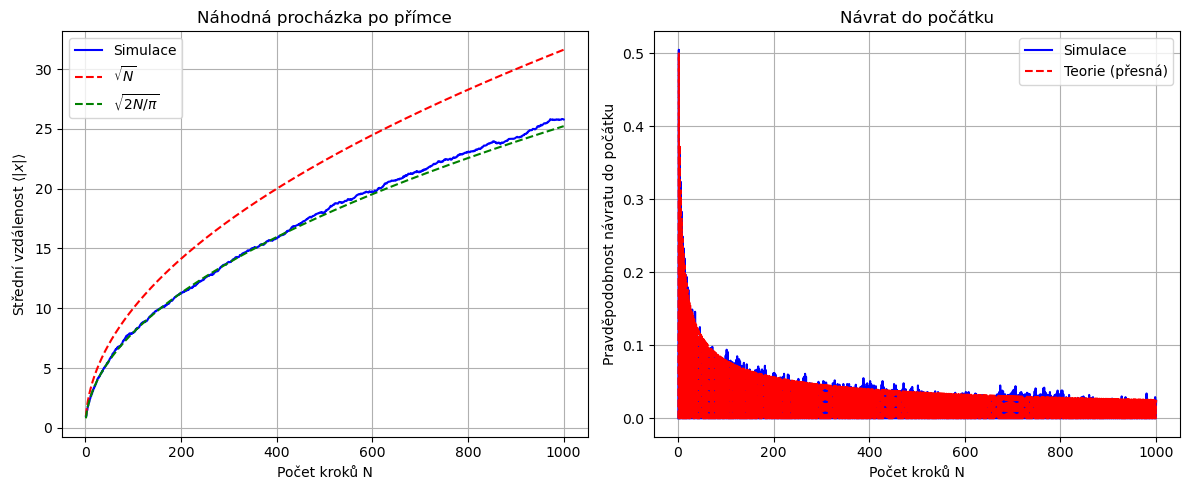

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb  

# Parametry
N = 1000   # počet kroků v jedné procházce
M = 1000   # počet simulovaných procházek

# Simulace náhodné procházky
steps = np.random.choice([-1, 1], size=(M, N))
positions = np.cumsum(steps, axis=1)

# Průměrná vzdálenost od počátku
mean_distance = np.mean(np.abs(positions), axis=0)

# Analytické křivky
n_steps = np.arange(1, N + 1)
analytic_curve_first_approximation = np.sqrt(n_steps)
analytic_curve_second_approximation = np.sqrt(2 * n_steps / np.pi)

# --- Pravděpodobnost návratu do počátku ---
returns = (positions == 0).mean(axis=0)

# Teoretická pravděpodobnost návratu do počátku (1D)
theoretical_return_exact = np.zeros_like(n_steps, dtype=float)
for i, n in enumerate(n_steps):
    if n % 2 == 0:
        theoretical_return_exact[i] = comb(n, n // 2, exact=False) / (2.0 ** n)
    else:
        theoretical_return_exact[i] = 0  # pro lichá N je návrat nemožný

# --- GRAFY ---
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# (1) Střední vzdálenost
axes[0].plot(n_steps, mean_distance, label='Simulace', color='blue')
axes[0].plot(n_steps, analytic_curve_first_approximation, label=r'$\sqrt{N}$', color='red', linestyle='--')
axes[0].plot(n_steps, analytic_curve_second_approximation, label=r'$\sqrt{2N/\pi}$', color='green', linestyle='--')
axes[0].set_xlabel('Počet kroků N')
axes[0].set_ylabel(r'Střední vzdálenost $\langle |x| \rangle$')
axes[0].set_title('Náhodná procházka po přímce')
axes[0].legend()
axes[0].grid(True)

# (2) Pravděpodobnost návratu do počátku
axes[1].plot(n_steps, returns, label='Simulace', color='blue')
axes[1].plot(n_steps, theoretical_return_exact, label='Teorie (přesná)', color='red', linestyle='--')
axes[1].set_xlabel('Počet kroků N')
axes[1].set_ylabel('Pravděpodobnost návratu do počátku')
axes[1].set_title('Návrat do počátku')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()
